In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('source_data\howpop_train.csv')

In [3]:
df.shape

(134137, 17)

In [4]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


In [5]:
#Избавимся сразу от переменных, названия которых заканчиваются на _lognorm.
# мой вариант
test = df.drop([k for k in df.columns if '_lognorm' in k],
               axis = 1,)

In [6]:
#Избавимся сразу от переменных, названия которых заканчиваются на _lognorm (нужны для соревнования на Kaggle). Выберем их с помощью filter() и удалим drop-ом:
# Вариант курса
df.drop(
    filter(lambda c: c.endswith("_lognorm"), df.columns),
    axis=1,  # axis = 1: столбцы
    inplace=True,
)  # избавляет от необходимости сохранять датасет

In [293]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set("notebook", font_scale=1.5, rc={"figure.figsize": (15, 5), "axes.titlesize": 18})

In [8]:
#Столбец published (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу datetime:
df["published"] = pd.to_datetime(df.published, yearfirst=True)

In [153]:
#Создадим несколько столбцов на основе данных о времени публикации:
df["year"]  = [d for d in df["published"].dt.year]
df["month"] = [d for d in df["published"].dt.month]
#df["day_of_week"] = [d for d in df["published"].dt.day_of_week] циферное обозначение дня недели
df["day_of_week"] = [d for d in df["published"].dt.day_name()]
df["hour"] = [d for d in df["published"].dt.hour]

# В курсе такой вариант:
#df["year"] = [d.year for d in df.published]
#df["month"] = [d.month for d in df.published]
#df["dayofweek"] = [d.isoweekday() for d in df.published]
#df["hour"] = [d.hour for d in df.published]

### 1. В каком месяце (и какого года) было больше всего публикаций?

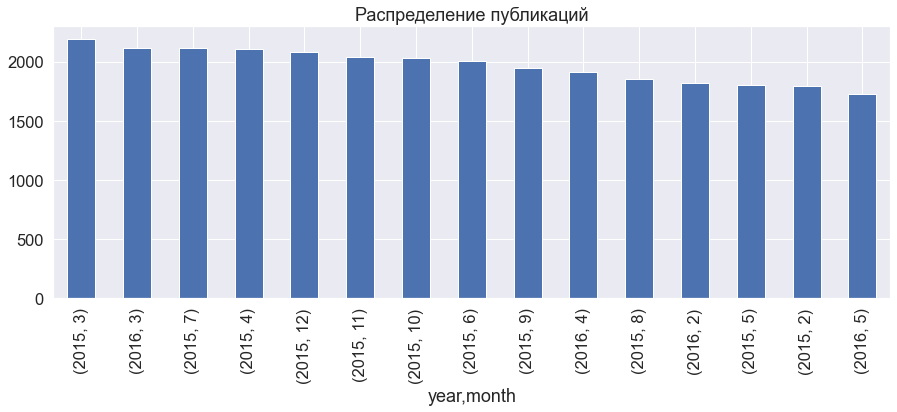

In [296]:
published_df = df[["year", 'month']]
published_df.value_counts()[:15].plot(kind = 'bar', title = 'Распределение публикаций');

### 2. Проанализируйте публикации в месяце из предыдущего вопроса
    Выберите один или несколько вариантов:
        Один или несколько дней сильно выделяются из общей картины
        На хабре всегда больше статей, чем на гиктаймсе
        По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей
Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр hue; не заморачивайтесь сильно с ответами и не ищите скрытого смысла :)

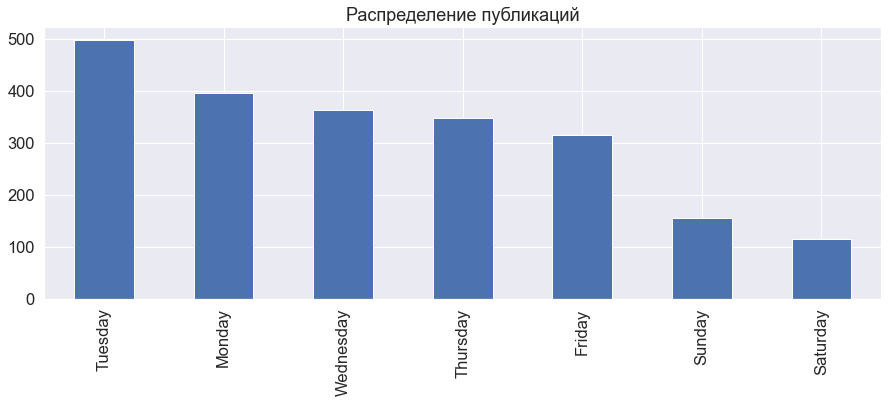

In [300]:
published_of_day = df[(df['year'] == 2015) & (df['month'] == 3)]['day_of_week'].value_counts()
published_of_day.plot(kind = 'bar', title = 'Распределение публикаций');

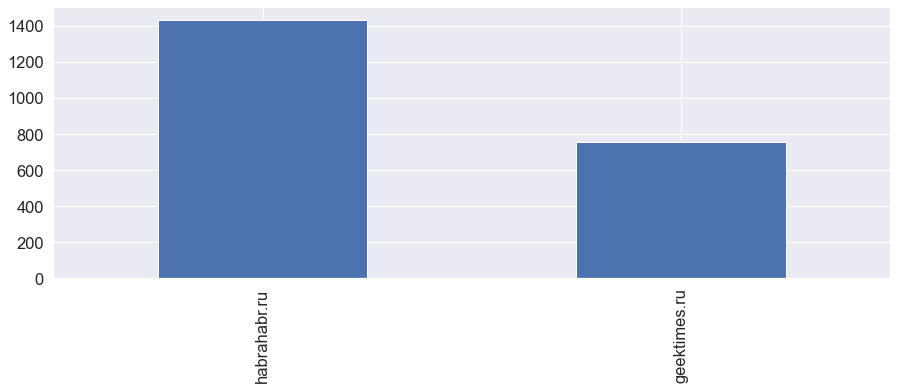

In [299]:
published_domain = df[(df['year'] == 2015) & (df['month'] == 3)]['domain'].value_counts()
published_domain.plot(kind = 'bar');

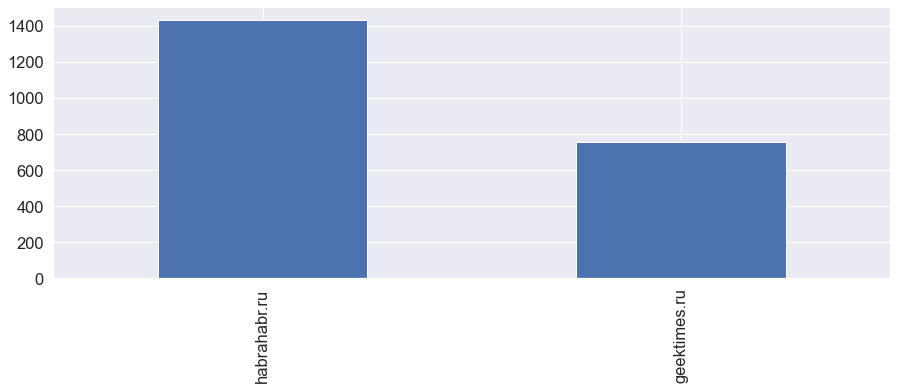

In [298]:
published_domain_of_day = df[(df['year'] == 2015) & (df['month'] == 3) & (df['day_of_week'] == 'Saturday')].value_counts()
published_domain.plot(kind = 'bar');

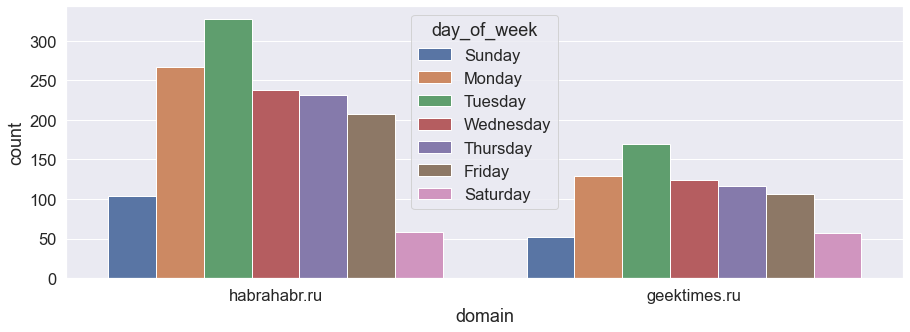

In [297]:
published_of_day_ = df[(df['year'] == 2015) & (df['month'] == 3)]
sns.countplot(x='domain', hue='day_of_week', data=published_of_day_);

### 3. Когда лучше всего публиковать статью?
    Больше всего просмотров набирают статьи, опубликованные в 12 часов дня
    У опубликованных в 10 утра постов больше всего комментариев
    Больше всего просмотров набирают статьи, опубликованные в 6 часов утра
    Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера
    На хабре дневные статьи комментируют чаще, чем вечерние